# Assingment in class, Jan 29, 2004

The questions and explanation of the assignement goes here.


I expect you to return the assignment notebook, well documented by yourself. I don't want to read my own words, except of the text of the assignment explanation.

The returned notebook should contain the essentials, but not all the intermezzo's that serve only as tutorial for you. But I do want to see a step by step build-up.

I want you to convince me that you understand the notebook that you return. This is what brings the points.

@T.N. Olsthoorn


## Importing modules

In [404]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import exp1 as W

## Convenience function to set up a figure

In [405]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
           xscale='linear', yscale='linear', size_inches=(14, 7)):
    '''Return axis of a new figure, set up according to the arguents and or defaults'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.grid()
    if not xlim is None:  ax.set_xlim(xlim)
    if not ylim is None:  ax.set_ylim(ylim)
    return ax

## Assigment

The assignment is solved step by step. First steady state, one point. Then more points. Then points a long the river bank. Then integrate along the river. Then make it transient. And finally compute for all river-bank points and all times, and integrate along the river. As very larst, show it for a few well distances and conclude what a proper distance is so that now water is flows into the ground (is extracted from the river) during the summer.

In [363]:
kD = 900. # m2/d
S = 0.2 # [-]

xw = -500.
x1, y1 = xw, 0 # pumping station, the well
x2, y2 = -xw, y1 # mirror well

Q1 = -1500 # extraction by PS
Q2 = -Q1   # extraction by mirror well


## Head change along the x-axis for several times

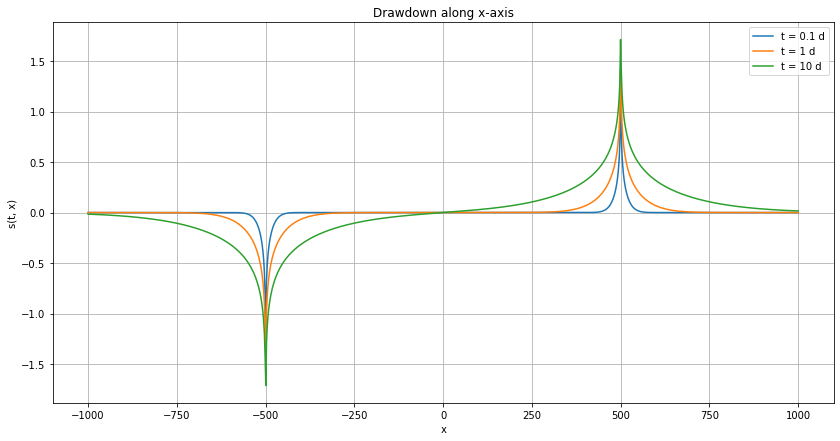

In [365]:
times = [0.1, 1, 10]
x = np.linspace(2 * xw, -2 * xw, 1000)
y = np.zeros_like(x)

ax = newfig('Drawdown along x-axis', 'x', 's(t, x)')

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

for t in times:
    u1 = r1 ** 2 * S /(4 * kD * t)
    u2 = r2 ** 2 * S /(4 * kD * t)
    s = Q1 / (4 * np.pi * kD) * W(u1) + Q2 / (4 * np.pi * kD) * W(u2)
    ax.plot(x, s, label=f't = {t:.4g} d')
ax.legend()

# The specific discharge to the well at any point

## Steady state first

In [366]:
x, y = 0., 100 # any point

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

q1 = Q1  / (2 * np.pi * r1)
q2 = Q2  / (2 * np.pi * r2)

qx1 = q1 * (x - x1) / r1 # x-component of the specific discharge due to the well
qx2 = q2 * (x - x2) / r2 # same due to the mirror well
qy1 = q1 * (y - y1) / r1 # y-component of the specific discharge due to the well
qy2 = q2 * (y - y2) / r2 # same due to the mirror well

# We can compute the x and y compents due to both well at once, don't need the 4 lines above
qx = q1 * (x - x1) / r1 + q2 * (x - x2) / r2  # added together, x-component
qy = q1 * (y - y1) / r1 + q2 * (y - y2) / r2  # same for mirror well

print(qx1, qx2, qy1, qy2, qx1 + qx2, qy1 + qy2)

-0.45910079738046733 -0.45910079738046733 -0.09182015947609347 0.09182015947609347 -0.9182015947609347 0.0


# Specific discharge $[m^3/d]$ at arbitrary points

Th specific discharge is here the discharge over the entire heigh of the aqufier per m perpdendicular to the flow. Its dimension is, therefore, m3/d/m = m2/d. For a point at a distance $r$ from a well and due to only this well, it is, the flow divided by the length of the circle with radius $r$ around the well:

$$q = \frac {Q} {2 \pi r}$$

We may illustrate the specific discharge by showing it at some arbitrary points. We just take a set of random points and show the specific discharge as a vector (a small line-piece) from each point into the direction of the vector. It will be scaled by a factor $a$ to make it visible. Scaling is necessary, because the dimension of the specific discharge differs from that of the $x$ and $y$ coordinates. Because we only want to illustrate these vectors, the value of the scale factor does not matter, just try a few values until you like the result.

So, the specific discharge has an $x$ and an $y$ component, which equal $q_x = q \cos(\alpha)$ and $q_y = q \sin(\alpha)$ with $\alpha$ the angle between the specific discharge vector and the $x$-axis:

$$\cos \alpha = \frac {x - x_w}{r}$$
$$\sin \alpha = \frac {y - y_w}{r}$$

so that

$$q_x = q \frac {x - x_w}{r}$$
$$q_y = q \frac {y - y_w}{r}$$

The plan is as follows:
    1. First we'll compute 200 random point locations
    2. Then we'll plot the points as dots and the well and its mirror as thicker circles
    3. Compute the specific discharge
    4. Compute the x and y components of the specific discharge
    5. For each point plot the specific dischrage vector multiplied by a scale vector $#a$

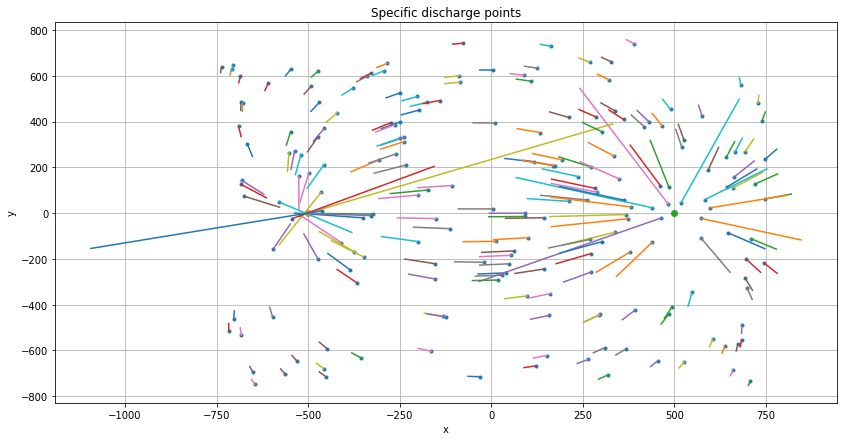

In [367]:
# random points
x = (np.random.rand(200) - 0.5) * 3 * xw
y = (np.random.rand(200) - 0.5) * 3 * xw

# Set up the figure, show the points, the well and its mirror
ax = newfig('Specific discharge points','x', 'y')
ax.plot(x, y, '.')
ax.plot(x1, y1, 'o') # well
ax.plot(x2, y2, 'o') # mirror well

# distances from well to each point and form mirror well to each point
r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

# Specific discharge (magnitute only) at all points
q1 = Q1  / (2 * np.pi * r1)
q2 = Q2  / (2 * np.pi * r2)

# Super positionn, add well and mirror well
qx = q1 * (x - x1) / r1 + q2 * (x - x2) / r2
qy = q1 * (y - y1) / r1 + q2 * (y - y2) / r2

a = 100. # scale factor for speciic discharge.

# For each point plot the scaled discharge vector
for i, (xi, yi) in enumerate(zip(x, y)):
    #print(i, [xi, xi + a * qx[i]],
    #         [yi, yi + a * qy[i]] )
    ax.plot([xi, xi + a * qx[i]],
            [yi, yi + a * qy[i]])


# Inflow to the river

Now that we can compute the specific discharge at any point, we can also plot them for points at the river bank. These are the point where the flow is perpendicular to the river bank.

The only thing we need to do to show them, is to plot them not for random points but only for points at the river bank. So just change the coordinates of the points to those at the river bank ($x=0$).

Nothing else is changed!

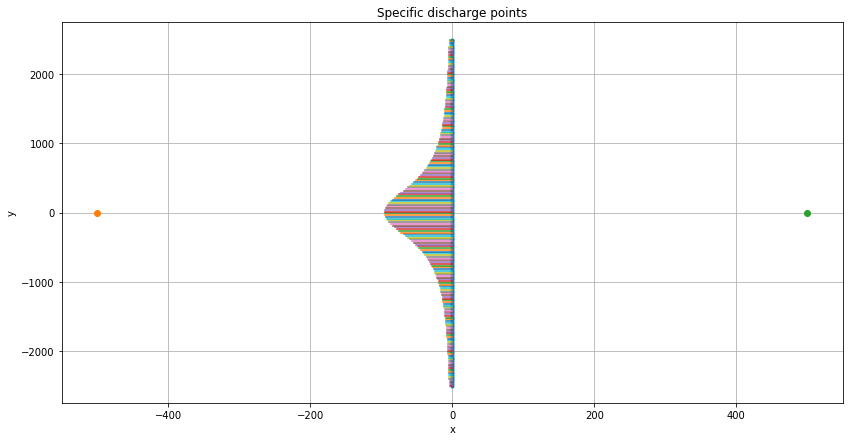

In [368]:
# New points, along the river bank
y = np.linspace(5 * xw, -5 * xw, 200)  # y values, print them to see what's happening here.
x = np.zeros_like(y) # A of all zeros, the vector is the same size as y.

ax = newfig('Specific discharge points','x', 'y')
ax.plot(x, y, '.')
ax.plot(x1, y1, 'o')
ax.plot(x2, y2, 'o')

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

q1 = Q1  / (2 * np.pi * r1)
q2 = Q2  / (2 * np.pi * r2)

qx = q1 * (x - x1) / r1 + q2 * (x - x2) / r2
qy = q1 * (y - y1) / r1 + q2 * (y - y2) / r2

a = 100. # scale factor
for i, (xi, yi) in enumerate(zip(x, y)):
    #print(i, [xi, xi + a * qx[i]],
    #         [yi, yi + a * qy[i]] )
    ax.plot([xi, xi + a * qx[i]],
            [yi, yi + a * qy[i]])


# The discharge at the river

Instead of printing the q vectors along the river bank on the x, y map, we can print them in a figure where the y-values are the y coordinates and where the x-values are the specific discharge. The y-axis then has dimension [m] and the x-axis has dimension [m2/d]. We can then do away with the scale factor $a$.

1. Change the x-label to 'specific discharge [m2/d]'
2. Chante the x in the plot to just qx[i]

But we can now also do away with the loop over the points, and, instead, plot y versus qx directly. This gives a graph showing the specific discharge at the river bank.

The rest is unaltered.

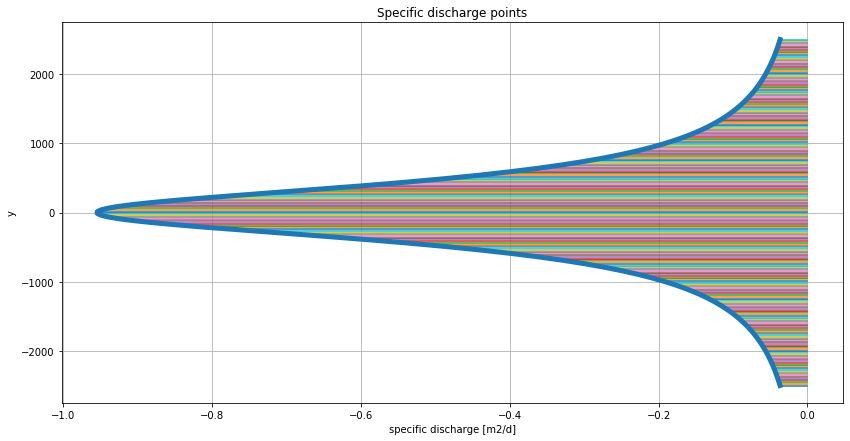

In [369]:
y = np.linspace(5 * xw, -5 * xw, 200)
x = np.zeros_like(y)

ax = newfig('Specific discharge points','specific discharge [m2/d]', 'y')

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

q1 = Q1  / (2 * np.pi * r1)
q2 = Q2  / (2 * np.pi * r2)

qx = q1 * (x - x1) / r1 + q2 * (x - x2) / r2
qy = q1 * (y - y1) / r1 + q2 * (y - y2) / r2

# Plot the individual vectors
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.plot([0,  qx[i]],
            [yi, yi])

# Plot as one (thick) line linewidth = 5.
ax.plot(qx, y, lw=5) # thick line


# Total inflow from river

The total inflow from the river is obtained by integrating the inflow along the $y$-axis.

We have an inflow value at every $y$-value. Integrating is equal to multiplying the inflow value with the length it represents along the $y$-axis and then summing it all. Using a simple trapezium rule would be

$$ Q_{intot} = \intop_{-\infty}^{+\infty} q_x(y) dy \approx \sum_{all\, y} q_x(y) * \Delta y $$

In the code below, we compute $\Delta y = diff(y) = y[1:] - y[:-1]$. The number of $\Delta y$ values is one less than the number of $q_x$-values. So we compute the sum as follows

$$ Q_{totin} = \sum_{\Delta y}  \frac {q_x[:-1] + q_x[1:]}{0.5} \times \Delta y $$

The rest is the same as before.

The total extraction from the river over -2500<y<2500 is -1311 m3/d
The total extraction from the river over the full y-axis would be Qw=-1500 m3/d


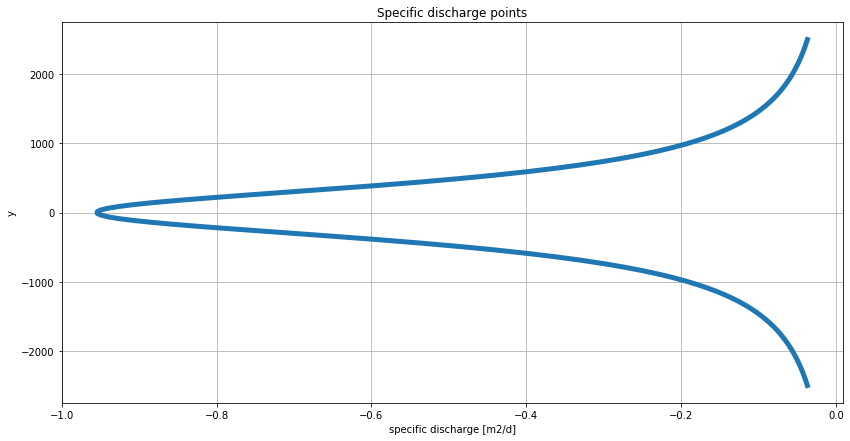

In [370]:
y = np.linspace(5 * xw, -5 * xw, 200)
x = np.zeros_like(y)

ax = newfig('Specific discharge points','specific discharge [m2/d]', 'y')

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

q1 = Q1  / (2 * np.pi * r1)
q2 = Q2  / (2 * np.pi * r2)

qx = q1 * (x - x1) / r1 + q2 * (x - x2) / r2
qy = q1 * (y - y1) / r1 + q2 * (y - y2) / r2

ax.plot(qx, y, lw=5)

dy = np.diff(y)

# Here is the integration:
Qintot = np.sum((qx[:-1] + qx[1:]) / 2 * dy)

# Here is the result
print(f'The total extraction from the river over {y[0]:.0f}<y<{y[-1]:.0f} is {Qintot:.0f} m3/d')
print(f'The total extraction from the river over the full y-axis would be Qw={Q1:.0f} m3/d')


## Convert the extraction from the river from steady-state to transient

The transtion total flow towards a well, and due to only that well, on a distance $r$ from the well is

$$ Q_r = Q_w \exp(-u),\,\,\,\,u = \frac{r^2 S}{4 kD t}$$

Therefore, the only thing to change is multiplying the Q1 and Q2 below by $e^{-u}$

Of course we have to define some times too. This way, we can iterate over these times and show the extraction from the river for different times.

At time = 1.0 d, Qintot =    -0 m3/d over -2500<y<2500
At time = 2.0 d, Qintot =    -0 m3/d over -2500<y<2500
At time = 5.0 d, Qintot =   -28 m3/d over -2500<y<2500
At time = 10.0 d, Qintot =  -143 m3/d over -2500<y<2500
At time = 20.0 d, Qintot =  -358 m3/d over -2500<y<2500
At time = 50.0 d, Qintot =  -684 m3/d over -2500<y<2500


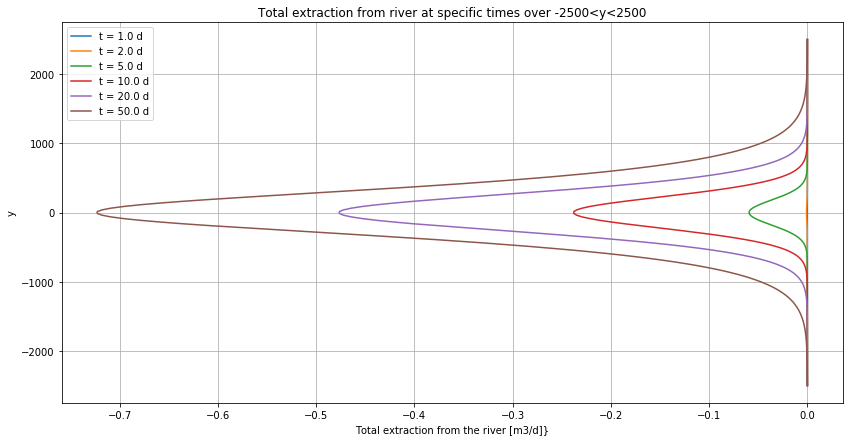

In [371]:
y = np.linspace(5 * xw, -5 * xw, 200)
x = np.zeros_like(y)

ax = newfig(f'Total extraction from river at specific times over {y[0]:.0f}<y<{y[-1]:.0f}','Total extraction from the river [m3/d]}', 'y')

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

# Define some times
times = [1, 2, 5, 10, 20, 50]

# Then iterate over these times
for t in times:  # inside the loop the current time is t
    u1 = r1 ** 2 * S / (4 * kD * t) # <-- t used
    u2 = r2 ** 2 * S / (4 * kD * t) # <-- t used

    q1 = Q1 * np.exp(-u1) / (2 * np.pi * r1)  # <-- Q1 multiplied by exp(-u1)
    q2 = Q2 * np.exp(-u2) / (2 * np.pi * r2)  # <-- Q2 multipleid by exp(-u2)

    qx = q1 * (x - x1) / r1 + q2 * (x - x2) / r2
    qy = q1 * (y - y1) / r1 + q2 * (y - y2) / r2

    ax.plot(qx, y, label=f't = {t:.1f} d')

    dy = np.diff(y)
    Qintot = np.sum(0.5 * dy * qx[:-1] + 0.5 * dy * qx[1:])

    # Here we print the total extraction from the river for each of the defined times
    print(f'At time = {t:2.1f} d, Qintot = {Qintot:5.0f} m3/d over {y[0]:.0f}<y<{y[-1]:.0f}')
ax.legend()


# Total inflow as function of time

Now we have everything in place to compute the total extraction from the river as a function of time. We just have to compute the total inflow for a large number of times, store the values in an array Qintot and then show the results in a figure.

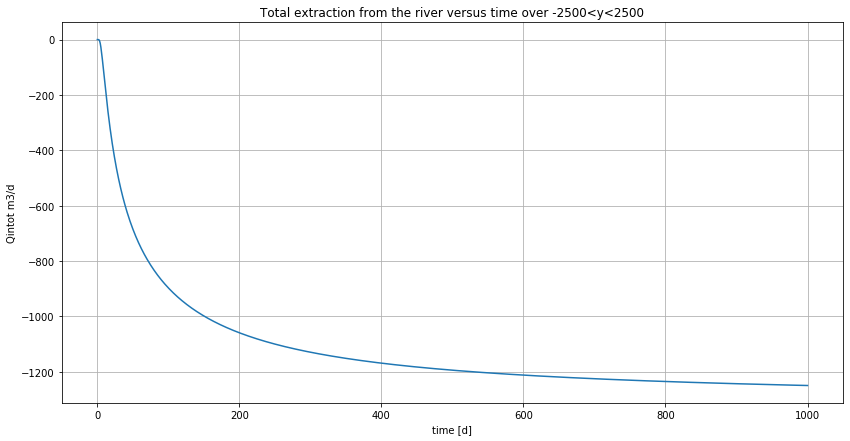

In [372]:
y = np.linspace(5 * xw, -5 * xw, 200)
x = np.zeros_like(y)

ax = newfig(f'Total extraction from the river versus time over {y[0]:.0f}<y<{y[-1]:.0f}',
            'time [d]', 'Qintot m3/d')

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

# We will now use a large number of times to compute the total inflow for.
times = np.linspace(0, 1000, 1001)
times[0] = 0.001 # prevent division by zero in computing u

# Initialize the Qintot array by zeros so that we can fill in the values in the loop below
Qintot = np.zeros_like(times)

for i, t in enumerate(times):
    u1 = r1 ** 2 * S / (4 * kD * t)
    u2 = r2 ** 2 * S / (4 * kD * t)

    q1 = Q1 * np.exp(-u1) / (2 * np.pi * r1)
    q2 = Q2 * np.exp(-u2) / (2 * np.pi * r2)

    qx = q1 * (x - x1) / r1 + q2 * (x - x2) / r2
    qy = q1 * (y - y1) / r1 + q2 * (y - y2) / r2

    dy = np.diff(y)
    # Here we store the values for t=times[i] in Qintot[i]
    Qintot[i] = np.sum(0.5 * dy * qx[:-1] + 0.5 * dy * qx[1:])

# Afterwards, we just have to make a graph of Qintot versus time
# However, the sign of extraction is negative, the same as that of the well extraction.
# This is fine. You could call it "infiltration into the river instead", then it makes sense that
# extraction is negative. It has the same sign as the extraction from the well, which too is negative
# as in infiltration would be positive. So the curve below will just be negative (=extraction from the river).
# You can just think of Qinto = the total inflow into the river. Then the sign makes sense.
ax.plot(times, Qintot) # change sign because it's inflow


# Using time-dependent well flow

## Data in the Excel workbook

Till now, the well rates were constant. However, in the assignment it varies over time as defined in the accompanying workbook "PumpingStationQ.xlsx". So we have to use superposition in time using the data in the Excel workbook.

En Excel workbook is clearly excellent to prepare the data so that you will have table that contains exactly the data that you'll need in Python. This prevents a lot of clutter in Python, and utilizes the power of Excel to prepare and order all kind of information to your needs. The only point is that you have to read in the data in Python.

## Using pandas

The most convenient way to read data from a .csv file or an Excel workbook into Python is by using Pandas. The whole world uses Pandas to work with tabled informatin, even if you'd have to deal with a million lines, Pandas will do this efficiently.

Pandas has an enormous amount of functionality, which you can find int the book on Pandas on the Internet or look at the documentation for Pandas on the Internet or even under the help menu of Jupyter. Pressing the pandas menu item under the help dropdown menu above, brings you immedately to the page that says:

`pandas: powerful Python data analysis toolkit`

I'd say have a look, it's powerful for any data analyse you'd ever need to do.

# Reading in the Excel workbook

Reading in the spreadsheet from the Exccel workbook in pandas can be as simple as running the line

`welldata = pd.read_excel('PumpingStationQ.xlsx')`

Just try it.

But there is a large number of optioinal arguments to this function to fine-tune reading in your data if things are more difficult. To see, them make a fresh cell, type pd.read_excel() and then with the cursor between the parentheses press shift-tab to see them.

What we'll do extra, is tell which column will be used as our index, which will be the data column, and make sure the values are not just strings but datenums, so we can use them in our computation.

In [373]:
# Readin the first spreadsheet in the workbook, use the first column as its index and parse the
# values which are strings into real date (datenums). All in one line. It's so simple because we 
# prepared our data so well in Excel.

welldata = pd.read_excel('PumpingStationQ.xlsx', index_col=0, parse_dates=True)

In [374]:
# Show the index
# The dtype, which is the type of the values in the index, shows 'datetime64[ns]', which is numpy's
# datenum objects (which is a 64 bit long integer number telling the date and time in nanoseconds accuracy)
# (In Excel datenums are floating point numbers, but in Python its an integer, but you should not look at it
# as an integer but as a np.datetime64 object), with its own functionality.
welldata.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
      

In [375]:
# The header of the coliums is also an index, that of the columns, here it is
welldata.columns

Index(['n', 'month', 'year', 'Qfac', 'Q', 'dQ', 'tch'], dtype='object')

In [376]:
# To get the so many-th line of the table you use the iloc (i is always a indication that we are dealing with 
# a whole number, something we can count)
# The fourth line of our table (remmeber the first line has inedex 0)
welldata['n'].iloc[3]

4

In [377]:
# The 7 th line of the table
welldata.iloc[6]

n           7.0
month       7.0
year     2010.0
Qfac       -1.0
Q       -1500.0
dQ          0.0
tch       181.0
Name: 2010-07-01 00:00:00, dtype: float64

In [378]:
# A few lines
welldata.iloc[4:8]

,n,month,year,Qfac,Q,dQ,tch
date,,,,,,,
2010-05-01,5,5,2010,0.0,0,0,120
2010-06-01,6,6,2010,-1.0,-1500,-1500,151
2010-07-01,7,7,2010,-1.0,-1500,0,181
2010-08-01,8,8,2010,-1.0,-1500,0,212


In [379]:
# Some columns and lines
welldata[['n', 'month', 'dQ']].iloc[4:9]

,n,month,dQ
date,,,
2010-05-01,5,5,0
2010-06-01,6,6,-1500
2010-07-01,7,7,0
2010-08-01,8,8,0
2010-09-01,9,9,1500


You can select values from the table using the index, i.e. using the datetimes directly. For that you used the `.log` instead of `.iloc`. 

In [380]:
welldata.loc[np.datetime64('2010-07-01')]

n           7.0
month       7.0
year     2010.0
Qfac       -1.0
Q       -1500.0
dQ          0.0
tch       181.0
Name: 2010-07-01 00:00:00, dtype: float64

In [381]:
# Here is a way to directly select lines from the table using datetimes

dt1 = np.datetime64('2010-07-01')
dt2 = np.datetime64('2011-08-01')

welldata.loc[dt1:dt2]

,n,month,year,Qfac,Q,dQ,tch
date,,,,,,,
2010-07-01,7,7,2010,-1.0,-1500,0,181
2010-08-01,8,8,2010,-1.0,-1500,0,212
2010-09-01,9,9,2010,0.0,0,1500,243
2010-10-01,10,10,2010,0.5,750,750,273
2010-11-01,11,11,2010,0.5,750,0,304
2010-12-01,12,12,2010,0.5,750,0,334
2011-01-01,13,1,2011,0.5,750,0,365
2011-02-01,14,2,2011,0.5,750,0,396
2011-03-01,15,3,2011,0.5,750,0,424


Ok, we've now seen some freatures of  pandas. Make sure you get familiar with it, because it's extremely useful for a great many purposes.

What we'll do now is loop over the lines in the table. Each line is a so-called change times, on which the flow from the well changes.

But because we simulate using days, not dates, we need the time in dates. Clearly this requries fixing a
starting time of the simulation, which will get the value zero, while the following values are increasing by 1.

A logical starting date would be the first change time, i.e. the first value of the index of the table. But we
could taken any value.

The point to know is that the only calculation you can do with datetimes, is subtract two datetimes, to get the
time difference between them, this will be a np.timedelta64 object. Lets subtract the two dt's we define above
to show this

In [382]:
dt2 - dt1

numpy.timedelta64(396,'D')

You see you got a np.timedelta64 object, which specifies the time difference is 296 days. Internally this will be a long integer number, but we don't mind, it's just a time difference.

Now to get the days as a floating point value instead of an object, you may divide the timedelta by the length of one day, hence also a timedelta64 object, which you can generate like this

`np.timedelta64(1, 'D')` # A timedelta object with the length of one day
`np.timedelta64(1, 'h')` # A timedelta object with the length of one hour

In [383]:
(dt2 - dt1) / np.timedelta64(1, 'D') # in days as a floating point number

396.0

In [384]:
(dt2 - dt1) / np.timedelta64(1, 'h') # in hours as a floating point number

9504.0

In [385]:
print(dt2)

2011-08-01


In [386]:
print(f'The difference between the datetimes {str(dt2)} and {str(dt1)} is {str(dt2-dt1)}')

print('We can express this differnce between datetimes in a floating point number')
print('by dividing the difference by a timedelta64 object of the desired length.')
print('For this to work, the timedelta84 object must be unique. Year, Month and Week do not work,')
print('but day, hour, minute, second, millisecond, microsecond and nanosecond do work.')

#(dt2 - dt1) / np.timedelta64(1, 'M') # month does not work, because month has not a fixec length
#(dt2 - dt1) / np.timedelta64(1, 'W') # Also incompatible
print('In days        : ', (dt2 - dt1) / np.timedelta64(1, 'D'))
print('In hours       : ', (dt2 - dt1) / np.timedelta64(1, 'h'))
print('In minutes     : ', (dt2 - dt1) / np.timedelta64(1, 'm'))
print('In seconds     : ', (dt2 - dt1) / np.timedelta64(1, 's'))
print('In milliseconds: ', (dt2 - dt1) / np.timedelta64(1, 'ms'))
print('In microsecons : ', (dt2 - dt1) / np.timedelta64(1, 'us'))
print('In nanoseconds : ', (dt2 - dt1) / np.timedelta64(1, 'ns'))

print('\nBut if you do want to use a week, you can just use a timedelta of 7 days:')
print('In week ( 7 days): ', (dt2 - dt1) / np.timedelta64(7, 'D'), ' weeks.')


The difference between the datetimes 2011-08-01 and 2010-07-01 is 396 days
We can express this differnce between datetimes in a floating point number
by dividing the difference by a timedelta64 object of the desired length.
For this to work, the timedelta84 object must be unique. Year, Month and Week do not work,
but day, hour, minute, second, millisecond, microsecond and nanosecond do work.
In days        :  396.0
In hours       :  9504.0
In minutes     :  570240.0
In seconds     :  34214400.0
In milliseconds:  34214400000.0
In microsecons :  34214400000000.0
In nanoseconds :  3.42144e+16

But if you do want to use a week, you can just use a timedelta of 7 days:
In week ( 7 days):  56.57142857142857  weeks.


The above should make you familiar with some datetime and timedelta manipulation.

What we'll do next is:

1. Fix a start datetime. We'll set it a bit earlier than our first change time, to convince you that it's really arbitraty.
2. Fix and end datetime, 3 months after the last date in our table
3. Generate an arary of times, starting at 0 at the first datetime, increasing to the last one
4. Get the number of days between the dates in the table and the startdate of our simulation

In [387]:
tstart = welldata.index[0] - np.timedelta64(7, 'D') # A week before our first datetime
tend   = welldata.index[-1] + np.timedelta64(28, 'D') # 4 weeks after our last datetime
n = (tend - tstart) / np.timedelta64(1, 'D') # the number of days of our simulation

print(f'The simulation will run from {str(tstart)} till {str(tend)}, which lasts {n} days.')

The simulation will run from 2009-12-25 00:00:00 till 2017-03-01 00:00:00, which lasts 2623.0 days.


Now let's get the changetimes in welldata in days after tstart as floating point numbers

In [388]:
tchs = welldata.index - tstart
tchs # as timedeltas

TimedeltaIndex([   '7 days',   '38 days',   '66 days',   '97 days',
                 '127 days',  '158 days',  '188 days',  '219 days',
                 '250 days',  '280 days',  '311 days',  '341 days',
                 '372 days',  '403 days',  '431 days',  '462 days',
                 '492 days',  '523 days',  '553 days',  '584 days',
                 '615 days',  '645 days',  '676 days',  '706 days',
                 '737 days',  '768 days',  '797 days',  '828 days',
                 '858 days',  '889 days',  '919 days',  '950 days',
                 '981 days', '1011 days', '1042 days', '1072 days',
                '1103 days', '1134 days', '1162 days', '1193 days',
                '1223 days', '1254 days', '1284 days', '1315 days',
                '1346 days', '1376 days', '1407 days', '1437 days',
                '1468 days', '1499 days', '1527 days', '1558 days',
                '1588 days', '1619 days', '1649 days', '1680 days',
                '1711 days', '1741 days', '1772 

In [389]:
# And now as floating point values
tchs = (welldata.index - tstart) / np.timedelta64(1, 'D')
tchs

Float64Index([   7.0,   38.0,   66.0,   97.0,  127.0,  158.0,  188.0,  219.0,
               250.0,  280.0,  311.0,  341.0,  372.0,  403.0,  431.0,  462.0,
               492.0,  523.0,  553.0,  584.0,  615.0,  645.0,  676.0,  706.0,
               737.0,  768.0,  797.0,  828.0,  858.0,  889.0,  919.0,  950.0,
               981.0, 1011.0, 1042.0, 1072.0, 1103.0, 1134.0, 1162.0, 1193.0,
              1223.0, 1254.0, 1284.0, 1315.0, 1346.0, 1376.0, 1407.0, 1437.0,
              1468.0, 1499.0, 1527.0, 1558.0, 1588.0, 1619.0, 1649.0, 1680.0,
              1711.0, 1741.0, 1772.0, 1802.0, 1833.0, 1864.0, 1892.0, 1923.0,
              1953.0, 1984.0, 2014.0, 2045.0, 2076.0, 2106.0, 2137.0, 2167.0,
              2198.0, 2229.0, 2258.0, 2289.0, 2319.0, 2350.0, 2380.0, 2411.0,
              2442.0, 2472.0, 2503.0, 2533.0, 2564.0, 2595.0],
             dtype='float64', name='date')

You see it's still an index and not an array. This may be ok, if not you can convert it into an array by passing it the funtion `np.asarray()`, like so:

In [390]:
tchs = np.asarray((welldata.index - tstart) / np.timedelta64(1, 'D'))
tchs

array([   7.,   38.,   66.,   97.,  127.,  158.,  188.,  219.,  250.,
        280.,  311.,  341.,  372.,  403.,  431.,  462.,  492.,  523.,
        553.,  584.,  615.,  645.,  676.,  706.,  737.,  768.,  797.,
        828.,  858.,  889.,  919.,  950.,  981., 1011., 1042., 1072.,
       1103., 1134., 1162., 1193., 1223., 1254., 1284., 1315., 1346.,
       1376., 1407., 1437., 1468., 1499., 1527., 1558., 1588., 1619.,
       1649., 1680., 1711., 1741., 1772., 1802., 1833., 1864., 1892.,
       1923., 1953., 1984., 2014., 2045., 2076., 2106., 2137., 2167.,
       2198., 2229., 2258., 2289., 2319., 2350., 2380., 2411., 2442.,
       2472., 2503., 2533., 2564., 2595.])

Ok, this should get you familiar, now all together, in practice

In [391]:
welldata = pd.read_excel('PumpingStationQ.xlsx', index_col=0, parse_dates=True)

tstart = welldata.index[ 0] - np.timedelta64(7 , 'D')
tend   = welldata.index[-1] + np.timedelta64(28, 'D')
tsim = np.arange(   (tend - tstart) / np.timedelta64(1, 'D')   )
tchs = np.asarray(  (welldata.index - tstart) / np.timedelta64(1, 'D')   )
tchs                

array([   7.,   38.,   66.,   97.,  127.,  158.,  188.,  219.,  250.,
        280.,  311.,  341.,  372.,  403.,  431.,  462.,  492.,  523.,
        553.,  584.,  615.,  645.,  676.,  706.,  737.,  768.,  797.,
        828.,  858.,  889.,  919.,  950.,  981., 1011., 1042., 1072.,
       1103., 1134., 1162., 1193., 1223., 1254., 1284., 1315., 1346.,
       1376., 1407., 1437., 1468., 1499., 1527., 1558., 1588., 1619.,
       1649., 1680., 1711., 1741., 1772., 1802., 1833., 1864., 1892.,
       1923., 1953., 1984., 2014., 2045., 2076., 2106., 2137., 2167.,
       2198., 2229., 2258., 2289., 2319., 2350., 2380., 2411., 2442.,
       2472., 2503., 2533., 2564., 2595.])

The easiest way to proceed is the compute the result for each river point separately. This will yield for every point at the river bank the specific discharge for all times. We can store this as a row in an array having a number of columns equal to the length of `tsim`. The number of rows in this array will then be equal to the number of `y` coordinates. With 200 y-coorcinates and about 2600 simulation times this give a large array, but that's fine in Python (but it has to fit in your computer's memory and the computation time should not become too long. This 200 y points with 2600 times is still fine.

With this array, if we plot a column, we have the specific inflow versus y, and if we plot a row we have the specific inflow at one point as a function of time. Hence the array has all we need.

To integrate along the y-axis, we just have to multip the columns by $\Delta y$ and sum over the rows like before, taking into account that the number of $\Delta y$ values is one less than the numver of $y$ values.

Multiplying the $\Delta y$ with the array works by automatic broadcasting, if we align the $\Delta y$ vector with the columns as will be shown.

# Everything in one cell, finally:

In [395]:
# Aquifer parameters
kD = 900 # m2/d, transmissivity
S  = 0.2 # [-], storage coefficient

# Get the data from the excel workbook
welldata = pd.read_excel('PumpingStationQ.xlsx', index_col=0, parse_dates=True)

# Set start and end time of the simulation, using the index from welldata
tstart = welldata.index[ 0] - np.timedelta64(7 , 'D')
tend   = welldata.index[-1] + np.timedelta64(28, 'D')

# Get the computation times in days as an array of floating points numbers
tsim = np.arange(   (tend - tstart) / np.timedelta64(1, 'D')   )

# Don't need the change times, here, we'll compute each one in the looop over the welldata below.

# The points along the river bank (I use capital letters here to differentiate with the scalars x, and y)
Y = np.linspace(5 * xw, -5 * xw, 200) # I use capital letter for the vector of coordinates
X = np.zeros_like(Y)                  # Here too capital X is the vector, x will be a single value

# The coordinates of the well and its mirror
xw = -500
x1, y1 =  xw,  0
x2, yw = -xw, y1

# initialize an array of zeros with the correct number of rows and columns
Qintot = np.zeros((len(Y), len(tsim)))

# Here is the outer loop, running over each of the river-bank points

print('This takes some time, so be patient.\nNr of points ready: ', end='')

for ip, (x, y) in enumerate(zip(X, Y)):  # ip is the point index (not the time index)

    if np.mod(ip, 10) == 0: print(ip, end=' ') # for your patience, shows progress of simulation

    # Distance from well and mirror to current point
    r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
    r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

    # Loop over all change times 
    for dt in welldata.index:  # dt is the data of the change

        # Compute the change time in days since start of simulation using the date from the index
        tch = (dt - tstart) / np.timedelta64(1, 'D')

        # Look up the change flow in tthe table column 'dQ' using the date from the index
        dQ1 =  + welldata['dQ'].loc[dt]              # well
        dQ2 =  - welldata['dQ'].loc[dt]              # mirror well

        if dQ1 == 0. : continue

        # Compute the u for all simulation times > tch
        u1 = r1 ** 2 * S / (4 * kD * (tsim[tsim > tch] - tch)) # only for tsim > current tch
        u2 = r2 ** 2 * S / (4 * kD * (tsim[tsim > tch] - tch)) # same for mirror well

        # The specific discharge at this point due to well and mirror well
        q1 = dQ1 * np.exp(-u1) / (2 * np.pi * r1)
        q2 = dQ2 * np.exp(-u2) / (2 * np.pi * r2)

        # Add the horizontal component of both wells together, do the same for the vertical component
        qx = q1 * (x - x1) / r1 + q2 * (x - x2) / r2
        qy = q1 * (y - y1) / r1 + q2 * (y - y2) / r2 # we don't use the vertical component, just for completeness

        # Put the horizontal component due to this dQ in Qinto row for this point, for all tsim > tch
        Qintot[ip][tsim > tch] += qx
print('done!')



This takes some time, so be patient.
Nr of points ready: 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 done!


At this point the Qinto array is filled

    Each row has the specific inflow for all times and one point
    Each column as the specific inflow at one time and all rows
    
Now we integrate over the points, along the y-axis just as we did before. The only difference is that we now have an array not just a vector. Anyway if we sum vertically, along the columns we get the total inflow. The only thing  we need to do make broadcasting work is to make $\Delta y$ ans array with rows corresponding to the points and one column. You can just ad an axis to the the vector to align the vector

## Intermezzo, showing how to turn a row-vector vertically to align it with the columns in the array

In [396]:
a = np.array([1, 3, 6, 0.2]) # standard vector (has no orientation)
b = a[np.newaxis, :]  # turn a in a 2d array with only one row (horizontal orientation)
c = a[:, np.newaxis] # turn a in a 2d array with one column (vertical orientation)
d = a[np.newaxis, :, np.newaxis] # turn it into a plane in a 3d array, with only one planec (advanced)
print('a = ', a, 'note, only single []')
print()
print('b = ', b, ' note, the double [[]]')
print()
print('c = ', c, ' note, the double [[]]')
print()
print('d = ', d, ' note the triple [[[]]]')

a =  [1.  3.  6.  0.2] note, only single []

b =  [[1.  3.  6.  0.2]]  note, the double [[]]

c =  [[1. ]
 [3. ]
 [6. ]
 [0.2]]  note, the double [[]]

d =  [[[1. ]
  [3. ]
  [6. ]
  [0.2]]]  note the triple [[[]]]


# Integrate the filled-in Qintot array along the columns (i.e.vertically)

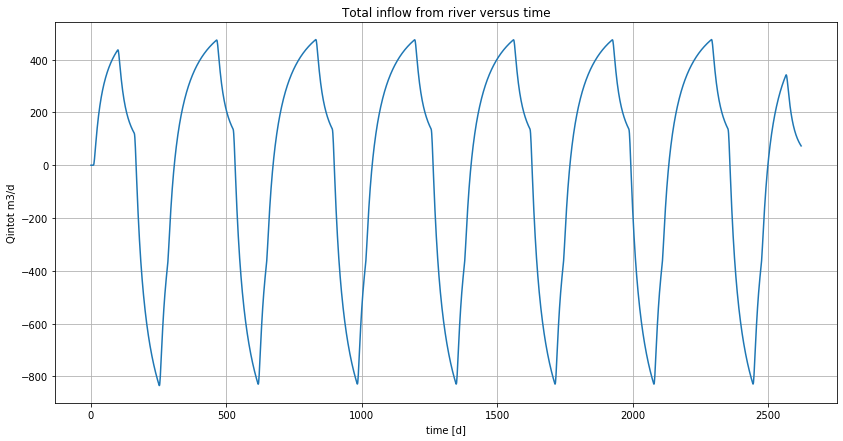

In [397]:
dY = np.diff(Y)[:, np.newaxis]  # align vertically, to apply broadcasting

Qin = np.sum( (Qintot[:-1] + Qintot[1:]) * dY  / 2, axis=0) # That's all 

# Now plot the end result
ax = newfig('Total inflow from river versus time','time [d]', 'Qintot m3/d')

ax.plot(tsim, Qin)


# To close off run, everything for several well, to immediately see the correct distance

Now that everything works, we can iterate over a number of distances xw to and put the result in one graph so easily see at what distance the extraction from the river is delayed sufficiently that it does not take place during summer.

We'll also compute the total well extraction to allow comparing of the extraction from the river with that from the pumping station's well.

Looping over 4 xw-values. This takes some time, so be patient!
xw =  -500 m. Nr of points ready: 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 done!
xw = -1000 m. Nr of points ready: 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 done!
xw = -1500 m. Nr of points ready: 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 done!
xw = -2000 m. Nr of points ready: 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 done!
Completely done!


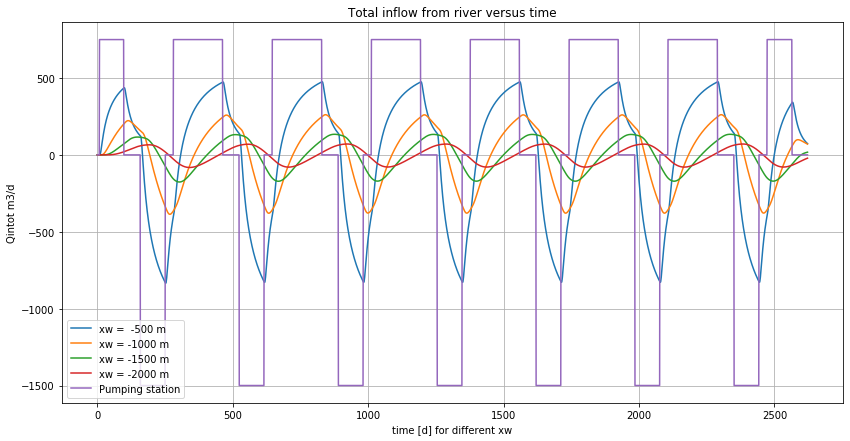

In [398]:
# Aquifer parameters
kD = 900. # m2/d, transmissivity
S  = 0.2 # [-], storage coefficient

# Get the data from the excel workbook
welldata = pd.read_excel('PumpingStationQ.xlsx', index_col=0, parse_dates=True)

# Set start and end time of the simulation, using the index from welldata
tstart = welldata.index[ 0] - np.timedelta64(7 , 'D')
tend   = welldata.index[-1] + np.timedelta64(28, 'D')

# Get the computation times in days as an array of floating points numbers
tsim = np.arange(   (tend - tstart) / np.timedelta64(1, 'D')   )

# Don't need the change times, here, we'll compute each one in the looop over the welldata below.

# The points along the river bank (I use capital letters here to differentiate with the scalars x, and y)
Y  = np.linspace(5 * xw, -5 * xw, 200) # I use capital letter for the vector of coordinates
X  = np.zeros_like(Y)                  # Here too capital X is the vector, x will be a single value
dY = np.diff(Y)[:, np.newaxis]  # align vertically, to apply broadcasting

# Some values for xw
Xw = [-500, -1000, -1500, -2000]

# Now plot the end result
ax = newfig('Total inflow from river versus time','time [d] for different xw', 'Qintot m3/d')


print(f'Looping over {len(Xw)} xw-values. This takes some time, so be patient!')

# loop over Xw
for xw in Xw:

    # The coordinates of the well and its mirror
    x1, y1 =  xw,  0
    x2, yw = -xw, y1

    # initialize an array of zeros with the correct number of rows and columns
    Qintot = np.zeros((len(Y), len(tsim)))

    # Here is the outer loop, running over each of the river-bank points

    print(f'xw = {xw:5.0f} m. Nr of points ready: ', end='')

    for ip, (x, y) in enumerate(zip(X, Y)):  # ip is the point index (not the time index)

        if np.mod(ip, 10) == 0: print(ip, end=' ') # for your patience, shows progress of simulation

        # Distance from well and mirror to current point
        r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
        r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)
        
        # Loop over all change times 
        for dt in welldata.index:  # dt is the data of the change

            # Compute the change time in days since start of simulation using the date from the index
            tch = (dt - tstart) / np.timedelta64(1, 'D')

            # Look up the change flow in tthe table column 'dQ' using the date from the index
            dQ1 =  + welldata['dQ'].loc[dt]              # well
            dQ2 =  - welldata['dQ'].loc[dt]              # mirror well

            if dQ1 == 0. : continue

            # Compute the u for all simulation times > tch
            u1 = r1 ** 2 * S / (4 * kD * (tsim[tsim > tch] - tch)) # only for tsim > current tch
            u2 = r2 ** 2 * S / (4 * kD * (tsim[tsim > tch] - tch)) # same for mirror well

            # The specific discharge at this point due to well and mirror well
            q1 = dQ1 * np.exp(-u1) / (2 * np.pi * r1)
            q2 = dQ2 * np.exp(-u2) / (2 * np.pi * r2)

            # Add the horizontal component of both wells together, do the same for the vertical component
            qx = q1 * (x - x1) / r1 + q2 * (x - x2) / r2
            qy = q1 * (y - y1) / r1 + q2 * (y - y2) / r2 # we don't use the vertical component, just for completeness

            # Put the horizontal component due to this dQ in Qinto row for this point, for all tsim > tch
            Qintot[ip][tsim > tch] += qx
            
            # Compute the extraction from the pumping station, do this only once
            if xw == Xw[0] and ip == 0:
                if dt == welldata.index[0]:
                    Qw = np.zeros_like(tsim)
                Qw[tsim > tch] += dQ1
                
    print('done!')
    
    # Integrate
    Qin = np.sum( (Qintot[:-1] + Qintot[1:]) * dY  / 2, axis=0) # That's all there to be done to integrate

    ax.plot(tsim, Qin, label=f'xw = {xw:5.0f} m')
print('Completely done!')

ax.plot(tsim, Qw, label='Pumping station')
ax.legend()




In [399]:
# So for xw is 1500 m or larger the extraction from the river is essentially zero.